In [138]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv("News_Dataset.csv")
df.head(10)

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
5,https://www.huffpost.com/entry/belk-worker-fou...,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS,The 63-year-old woman was seen working at the ...,NaN,2022-09-22
6,https://www.huffpost.com/entry/reporter-gets-a...,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS,"""Who's that behind you?"" an anchor for New Yor...",Elyse Wanshel,2022-09-22
7,https://www.huffpost.com/entry/puerto-rico-wat...,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS,More than half a million people remained witho...,"DÁNICA COTO, AP",2022-09-22
8,https://www.huffpost.com/entry/mija-documentar...,How A New Documentary Captures The Complexity ...,CULTURE & ARTS,"In ""Mija,"" director Isabel Castro combined mus...",Marina Fang,2022-09-22
9,https://www.huffpost.com/entry/biden-un-russia...,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS,White House officials say the crux of the pres...,"Aamer Madhani, AP",2022-09-21


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   link               209527 non-null  object
 1   headline           209521 non-null  object
 2   category           209527 non-null  object
 3   short_description  189815 non-null  object
 4   authors            172109 non-null  object
 5   date               209527 non-null  object
dtypes: object(6)
memory usage: 9.6+ MB


# Checking Null values

In [141]:
df.isnull().sum()

link                     0
headline                 6
category                 0
short_description    19712
authors              37418
date                     0
dtype: int64

In [142]:
# Print the column names of your DataFrame
print(df.columns)


Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')


In [143]:
to_drop = ['link','short_description','authors', 'date']
df.drop(to_drop,inplace=True,axis=1)

In [144]:
#to_drop = ['short_description']

In [145]:
# Print the column names of your DataFrame
print(df.columns)

# Check if the specified columns exist in the DataFrame
for column in to_drop:
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame")


Index(['headline', 'category'], dtype='object')
Column 'link' not found in DataFrame
Column 'short_description' not found in DataFrame
Column 'authors' not found in DataFrame
Column 'date' not found in DataFrame


In [146]:
df.head(20)

,headline,category
0,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY
3,The Funniest Tweets From Parents This Week (Se...,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS
5,Cleaner Was Dead In Belk Bathroom For 4 Days B...,U.S. NEWS
6,Reporter Gets Adorable Surprise From Her Boyfr...,U.S. NEWS
7,Puerto Ricans Desperate For Water After Hurric...,WORLD NEWS
8,How A New Documentary Captures The Complexity ...,CULTURE & ARTS
9,Biden At UN To Call Russian War An Affront To ...,WORLD NEWS


In [147]:
df.duplicated().sum()

1419

In [148]:
df = df.drop_duplicates()

In [149]:
df.duplicated().sum()

0

In [150]:
df['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [151]:
df.dtypes

headline    object
category    object
dtype: object

In [152]:
category_counts = df['category'].value_counts()

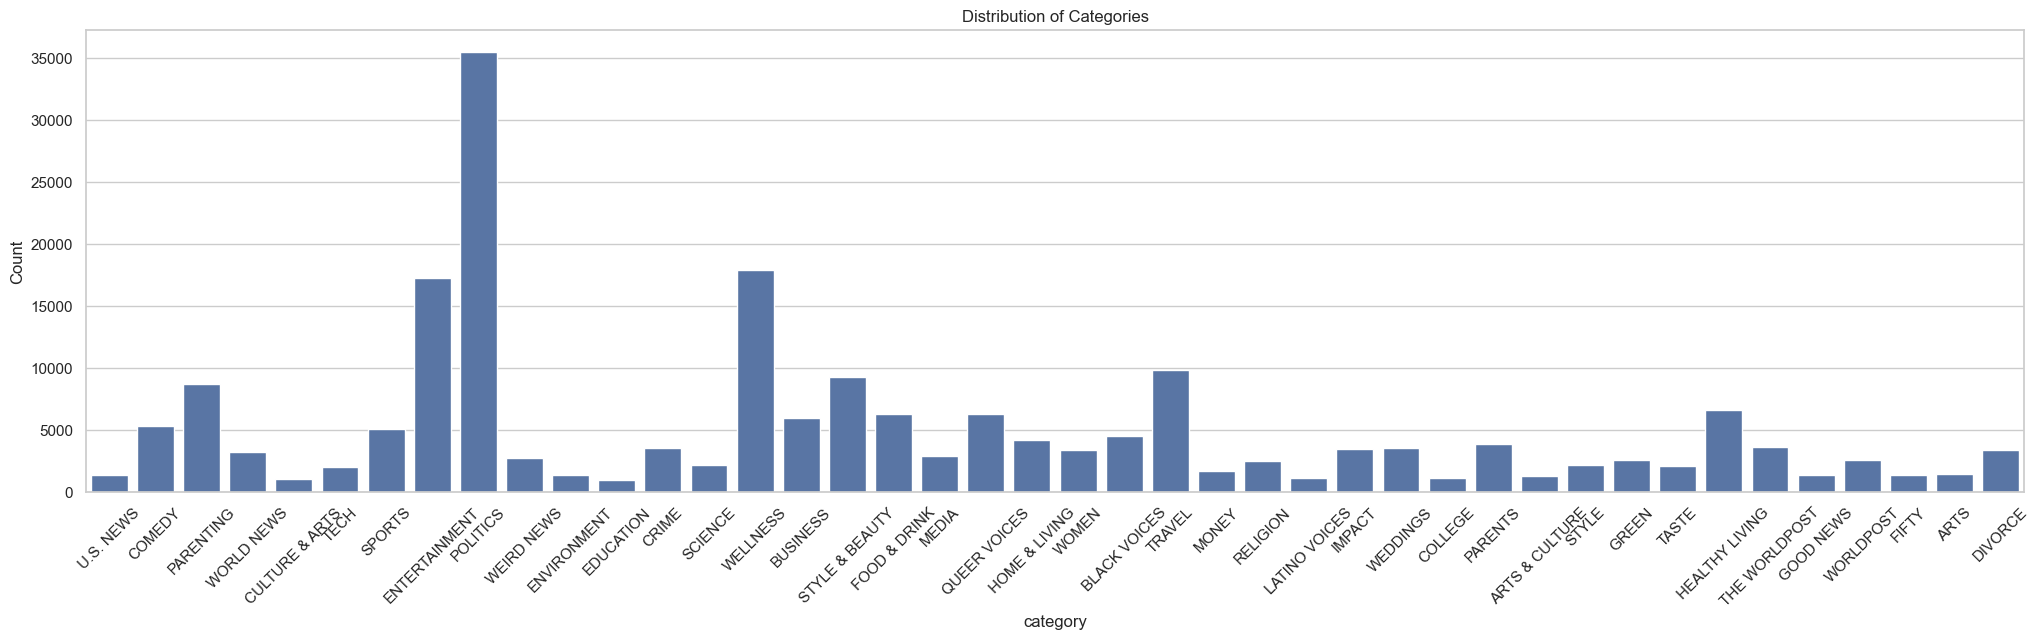

In [153]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and the column you want to visualize is named 'category'
plt.figure(figsize=(25, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.title('Distribution of Categories')
plt.xlabel('category')
plt.ylabel('Count')
plt.show()


In [154]:
df['category'].unique()

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

In [155]:
# Assuming your DataFrame is named df and the column containing categories is named 'category'

# Filter out rows with categories 'tech' and 'sports'
df = df[~df['category'].isin(['PARENTING', 'U.S. NEWS', 'WEIRD NEWS', 'WELLNESS', 'FOOD & DRINK', 'MEDIA', 'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'MONEY', 'LATINO VOICES', 'IMPACT', 'WEDDINGS', 'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'GREEN', 'TASTE', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY','DIVORCE'])]

# Print the shape of the filtered DataFrame to verify the removal
print("Shape of filtered DataFrame:", df.shape)

# Optionally, you can reset the index of the filtered DataFrame if you want
df.reset_index(drop=True, inplace=True)

# Optionally, you can save the filtered DataFrame to a new CSV file
df.to_csv('filtered_dataset.csv', index=False)

# Print the head of the filtered DataFrame to inspect the result
print(df.head())


Shape of filtered DataFrame: (115956, 2)
                                            headline        category
0  23 Of The Funniest Tweets About Cats And Dogs ...          COMEDY
1  Puerto Ricans Desperate For Water After Hurric...      WORLD NEWS
2  How A New Documentary Captures The Complexity ...  CULTURE & ARTS
3  Biden At UN To Call Russian War An Affront To ...      WORLD NEWS
4  World Cup Captains Want To Wear Rainbow Armban...      WORLD NEWS


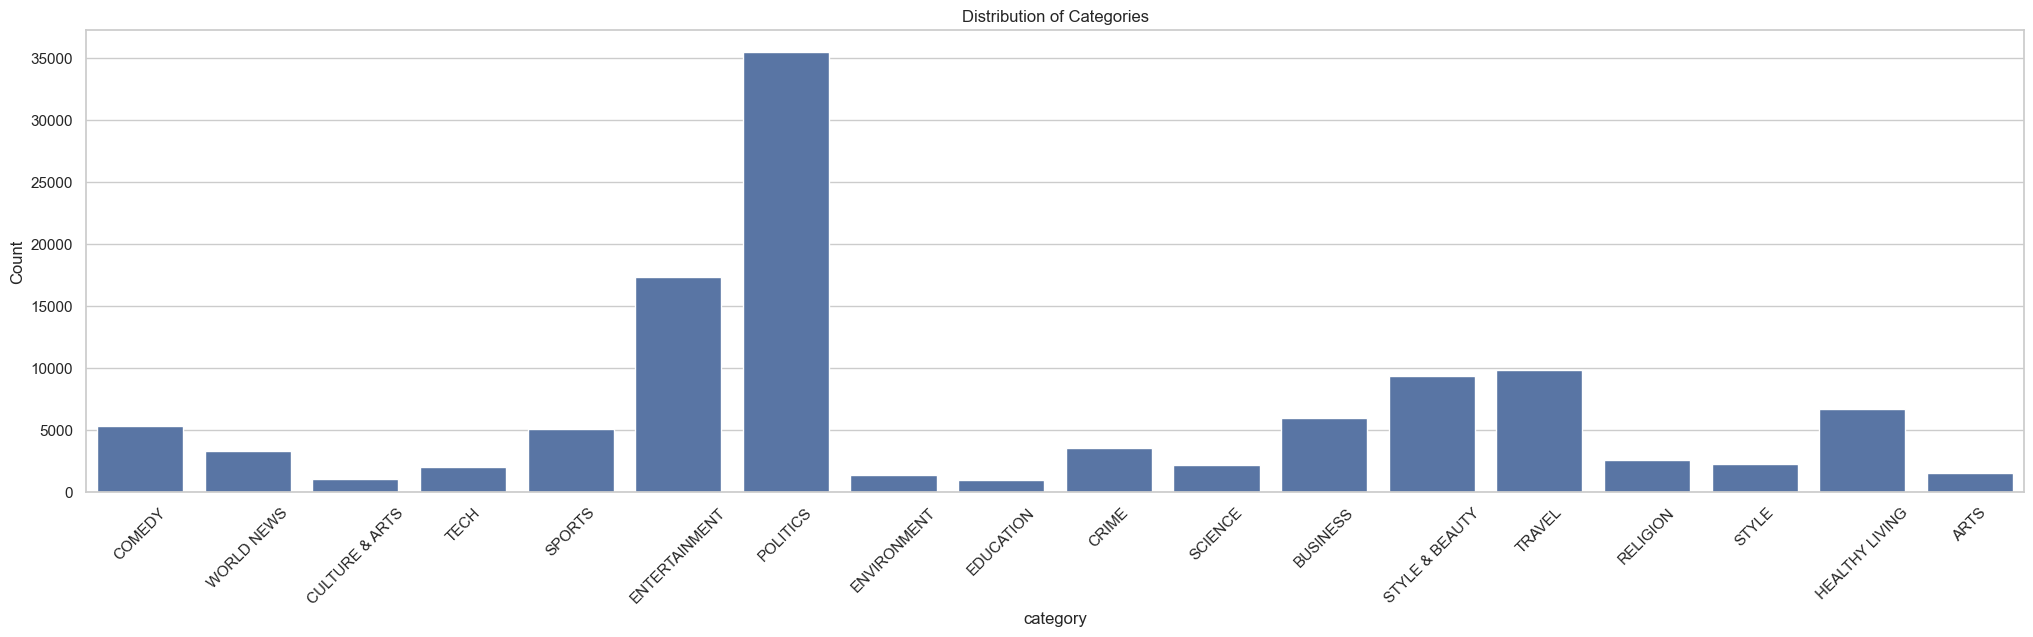

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and the column you want to visualize is named 'category'
plt.figure(figsize=(25, 6))  # Adjust the figure size if needed
sns.countplot(data=df, x='category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.title('Distribution of Categories')
plt.xlabel('category')
plt.ylabel('Count')
plt.show()

In [157]:
#sns.set(style="whitegrid")
#plt.figure(figsize=(10, 6))
#sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")

# Text PreProcessing

In [158]:
# converting dataset to lower
df['headline'].str.lower()

0         23 of the funniest tweets about cats and dogs ...
1         puerto ricans desperate for water after hurric...
2         how a new documentary captures the complexity ...
3         biden at un to call russian war an affront to ...
4         world cup captains want to wear rainbow armban...
                                ...                        
115951    rim ceo thorsten heins' 'significant' plans fo...
115952    maria sharapova stunned by victoria azarenka i...
115953    giants over patriots, jets over colts among  m...
115954    aldon smith arrested: 49ers linebacker busted ...
115955    dwight howard rips teammates after magic loss ...
Name: headline, Length: 115956, dtype: object

In [161]:
#function for removing of html tags
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', str(text))

# Apply the function after converting the column to string
#df['headline'] = df['headline'].apply(remove_html_tags)


In [162]:
# Removing html tags
df['headline']=df['headline'].apply(remove_html_tags)
#df.info()

In [163]:
#function for removing url
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', str(text))

In [164]:
# Removing urls
df['headline'].apply(remove_url)

0         23 Of The Funniest Tweets About Cats And Dogs ...
1         Puerto Ricans Desperate For Water After Hurric...
2         How A New Documentary Captures The Complexity ...
3         Biden At UN To Call Russian War An Affront To ...
4         World Cup Captains Want To Wear Rainbow Armban...
                                ...                        
115951    RIM CEO Thorsten Heins' 'Significant' Plans Fo...
115952    Maria Sharapova Stunned By Victoria Azarenka I...
115953    Giants Over Patriots, Jets Over Colts Among  M...
115954    Aldon Smith Arrested: 49ers Linebacker Busted ...
115955    Dwight Howard Rips Teammates After Magic Loss ...
Name: headline, Length: 115956, dtype: object

In [165]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [166]:
exclude = string.punctuation

In [167]:
#function for removing punctuation
def remove_punc(text):
    return text.translate(str.maketrans('', '', exclude))

In [169]:
df['headline'].apply(remove_punc)

0         23 Of The Funniest Tweets About Cats And Dogs ...
1         Puerto Ricans Desperate For Water After Hurric...
2         How A New Documentary Captures The Complexity ...
3         Biden At UN To Call Russian War An Affront To ...
4         World Cup Captains Want To Wear Rainbow Armban...
                                ...                        
115951    RIM CEO Thorsten Heins Significant Plans For B...
115952    Maria Sharapova Stunned By Victoria Azarenka I...
115953    Giants Over Patriots Jets Over Colts Among  Mo...
115954    Aldon Smith Arrested 49ers Linebacker Busted F...
115955    Dwight Howard Rips Teammates After Magic Loss ...
Name: headline, Length: 115956, dtype: object

In [170]:
# Spelling correction
#from textblob import TextBlob

In [171]:
#TextBlob(df['Text']).correct().string

In [172]:
from nltk.tokenize import word_tokenize

In [173]:
def tokenize_text(text):
    return word_tokenize(text)

In [176]:
df['headline'].apply(tokenize_text)

0         [23, Of, The, Funniest, Tweets, About, Cats, A...
1         [Puerto, Ricans, Desperate, For, Water, After,...
2         [How, A, New, Documentary, Captures, The, Comp...
3         [Biden, At, UN, To, Call, Russian, War, An, Af...
4         [World, Cup, Captains, Want, To, Wear, Rainbow...
                                ...                        
115951    [RIM, CEO, Thorsten, Heins, ', 'Significant, '...
115952    [Maria, Sharapova, Stunned, By, Victoria, Azar...
115953    [Giants, Over, Patriots, ,, Jets, Over, Colts,...
115954    [Aldon, Smith, Arrested, :, 49ers, Linebacker,...
115955    [Dwight, Howard, Rips, Teammates, After, Magic...
Name: headline, Length: 115956, dtype: object

In [182]:
df['headline'] = list(map(remove_html_tags, df['headline']))
df['headline'] = list(map(remove_url, df['headline']))
df['headline'] = list(map(remove_punc, df['headline']))
df['headline'] = list(map(tokenize_text, df['headline']))

In [183]:
df['headline'] [0]

['23',
 'Of',
 'The',
 'Funniest',
 'Tweets',
 'About',
 'Cats',
 'And',
 'Dogs',
 'This',
 'Week',
 'Sept',
 '1723']

In [184]:
#df.to_csv('News_Preprocessed.csv')

In [185]:
#ab = pd.read_csv("News_Preprocessed.csv")
#ab.head(10)

In [186]:
df.head()

,headline,category
0,"[23, Of, The, Funniest, Tweets, About, Cats, A...",COMEDY
1,"[Puerto, Ricans, Desperate, For, Water, After,...",WORLD NEWS
2,"[How, A, New, Documentary, Captures, The, Comp...",CULTURE & ARTS
3,"[Biden, At, UN, To, Call, Russian, War, An, Af...",WORLD NEWS
4,"[World, Cup, Captains, Want, To, Wear, Rainbow...",WORLD NEWS


# Spliting data into Train, Test & Validation

In [188]:
X = df['headline']
y = df['category']

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
#X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=10)

In [190]:
# Display the sizes of the resulting sets
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 81169
Testing set size: 34787


# Label Encoding

In [191]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

In [192]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [193]:
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class Mapping:")
for class_label, encoded_value in class_mapping.items():
    print(f"{class_label}: {encoded_value}")

Class Mapping:
ARTS: 0
BUSINESS: 1
COMEDY: 2
CRIME: 3
CULTURE & ARTS: 4
EDUCATION: 5
ENTERTAINMENT: 6
ENVIRONMENT: 7
HEALTHY LIVING: 8
POLITICS: 9
RELIGION: 10
SCIENCE: 11
SPORTS: 12
STYLE: 13
STYLE & BEAUTY: 14
TECH: 15
TRAVEL: 16
WORLD NEWS: 17


# LSTM model

In [198]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
max_words = 10000  
max_sequence_length = 100  
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequence, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequence, maxlen=max_sequence_length)

In [199]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional
embedding_dim = 1000
batch_size = 64
epochs = 5

model1 = Sequential()
model1.add(Embedding(max_words, embedding_dim, input_length=100))
model1.add(Bidirectional(LSTM(128)))
#model.add(LSTM(100))
#model.add(Dropout(0.3))
model1.add(Dense(128,activation='relu'))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(18, activation='softmax'))
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 1000)         10000000  
                                                                 
 bidirectional_3 (Bidirecti  (None, 256)               1156096   
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 18)                1170      
                                                                 
Total params: 11198418 (42.72 MB)
Trainable params: 11198418 (42.72 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [200]:
#from tensorflow.keras.optimizers import Adam
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
1142/1142 [==============================] - 487s 418ms/step - loss: 1.3694 - accuracy: 0.6052 - val_loss: 1.0536 - val_accuracy: 0.7015
Epoch 2/5
1142/1142 [==============================] - 439s 384ms/step - loss: 0.8486 - accuracy: 0.7488 - val_loss: 1.0025 - val_accuracy: 0.7094
Epoch 3/5
1142/1142 [==============================] - 431s 377ms/step - loss: 0.6361 - accuracy: 0.8055 - val_loss: 1.0284 - val_accuracy: 0.7141
Epoch 4/5
1142/1142 [==============================] - 432s 378ms/step - loss: 0.4648 - accuracy: 0.8552 - val_loss: 1.1530 - val_accuracy: 0.6991
Epoch 5/5
1142/1142 [==============================] - 435s 380ms/step - loss: 0.3283 - accuracy: 0.8967 - val_loss: 1.3363 - val_accuracy: 0.6936


In [201]:
model1.evaluate(X_test_padded,y_test_encoded)

1088/1088 [==============================] - 54s 49ms/step - loss: 1.3648 - accuracy: 0.6832


[1.3647620677947998, 0.6832150220870972]

In [203]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
def predict_class(text):
    user_sequences = tokenizer.texts_to_sequences([text])
    user_padded = tf.keras.preprocessing.sequence.pad_sequences(user_sequences, maxlen=100)
    class_mapping={0: 'ARTS', 1: 'BUSINESS', 2: 'COMEDY', 3: 'CRIME', 4: 'CULTURE & ARTS', 5: 'EDUCATION', 6: 'ENTERTAINMENT', 7: 'ENVIRONMENT', 8: 'HEALTHY LIVING', 9: 'POLITICS', 10: 'RELIGION', 11: 'SCIENCE', 12: 'SPORTS', 13: 'STYLE', 14: 'STYLE & BEAUTY', 15: 'TECH',16: 'TRAVEL', 17: 'WORLD NEWS'}
    user_predictions = model1.predict(user_padded)
    user_pred_classes = np.argmax(user_predictions, axis=1)

    print(f'This news belong to : {class_mapping[user_pred_classes[0]]}')

In [216]:
predict_class("These tourist hot spots are introducing entry fees and price hikes for 2024")

1/1 [==============================] - 0s 34ms/step
This news belong to : TRAVEL
